In [76]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("./credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [78]:
df.info

<bound method DataFrame.info of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amn

In [79]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

# Distribution of people by the age

In [80]:
df["person_age"].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

Text(0, 0.5, 'People count')

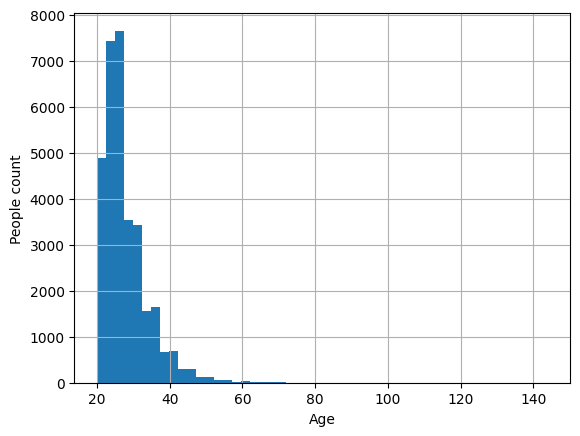

In [81]:
df["person_age"].hist(bins=50)
plt.xlabel("Age")
plt.ylabel("People count")

In [82]:
# removing the outliers
df = df[df["person_age"] <= 120]
df["person_age"].describe()

count    32576.000000
mean        27.718044
std          6.204990
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

## Most of the people lies between age 20 to 30

In [83]:
df["person_income"].describe()  

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [84]:
df = df[df["person_income"] < 2039000]

In [85]:
df.person_income.describe()

count    3.257500e+04
mean     6.582155e+04
std      5.138475e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      1.900000e+06
Name: person_income, dtype: float64

In [86]:
df['person_home_ownership'].value_counts()
df['person_home_ownership'].value_counts(normalize=True)*100


person_home_ownership
RENT        50.474290
MORTGAGE    41.264774
OWN          7.932464
OTHER        0.328473
Name: proportion, dtype: float64

#### insights from this data
1. Half of the people lives in the rented house
2. 41% having mortgages ( house as collateral for the home loan of same house )
3. nearly 8% people own their house
4. Very few people in other category

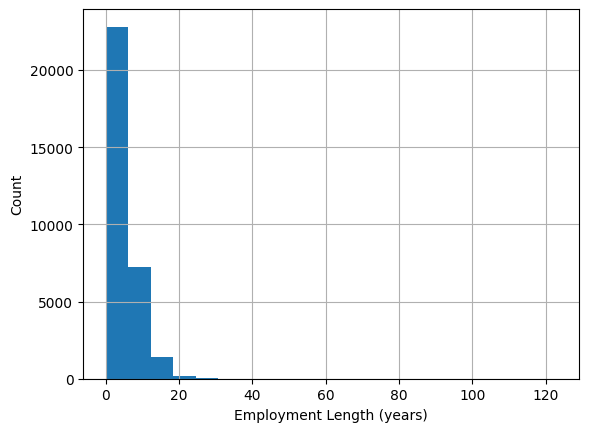

In [87]:
df['person_emp_length'].hist(bins=20)
plt.xlabel("Employment Length (years)")
plt.ylabel("Count")
plt.show()

In [88]:
df.person_emp_length.describe()

count    31680.000000
mean         4.789678
std          4.142684
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [89]:
df[df["person_emp_length"] > 100].value_counts()

person_age  person_income  person_home_ownership  person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length
21          192000         MORTGAGE               123.0              VENTURE      A           20000      6.54           0            0.10                 N                          4                             1
22          59000          RENT                   123.0              PERSONAL     D           35000      16.02          1            0.59                 Y                          3                             1
Name: count, dtype: int64

In [90]:
mean_emp_length = df[df["person_emp_length"] <= 60]["person_emp_length"].mean()
df.loc[df["person_emp_length"] > 60, "person_emp_length"] = mean_emp_length

In [91]:
print(df['cb_person_cred_hist_length'].describe())


count    32575.000000
mean         5.803684
std          4.053533
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


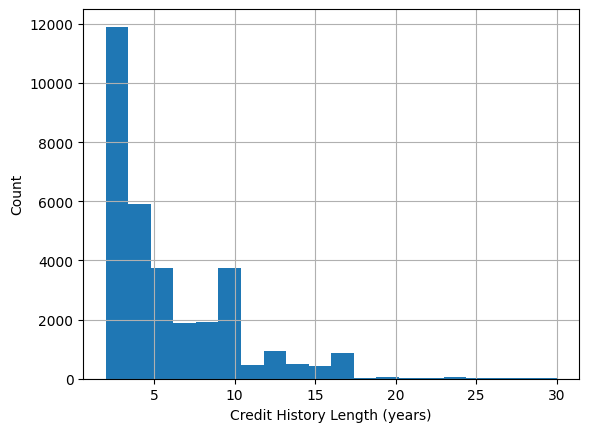

In [92]:
df['cb_person_cred_hist_length'].hist(bins=20)
plt.xlabel("Credit History Length (years)")
plt.ylabel("Count")
plt.show()

In [93]:
df["loan_amnt"].describe()

count    32575.000000
mean      9589.152724
std       6321.980733
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [94]:
df["loan_int_rate"].describe()

count    29460.000000
mean        11.011503
std          3.240669
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [95]:
print("Loan Status Value Counts = " ,df["loan_status"].value_counts())
print(df["loan_status"].value_counts(normalize=True)*100)

Loan Status Value Counts =  loan_status
0    25467
1     7108
Name: count, dtype: int64
loan_status
0    78.179586
1    21.820414
Name: proportion, dtype: float64


In [96]:
df["loan_percent_income"].describe()

count    32575.000000
mean         0.170218
std          0.106775
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

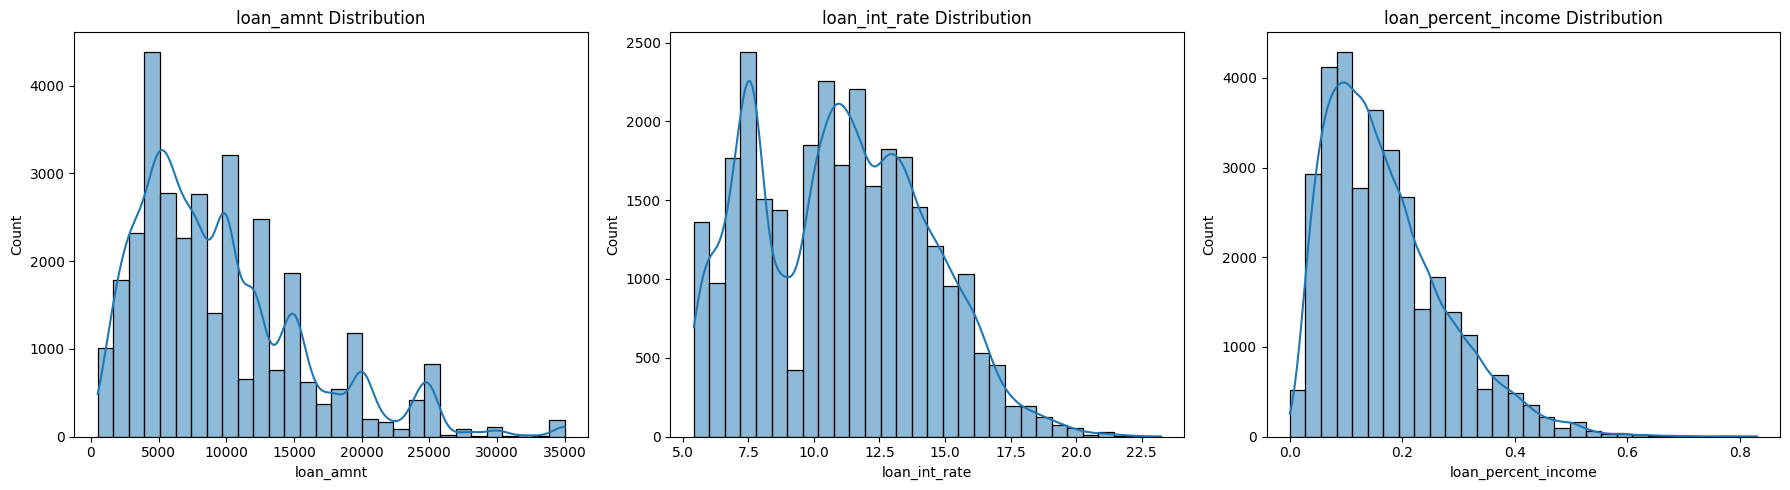

In [97]:
features = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']

plt.figure(figsize=(18,5))

for i, f in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[f], bins=30, kde=True)
    plt.title(f'{f} Distribution')
    plt.xlabel(f)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

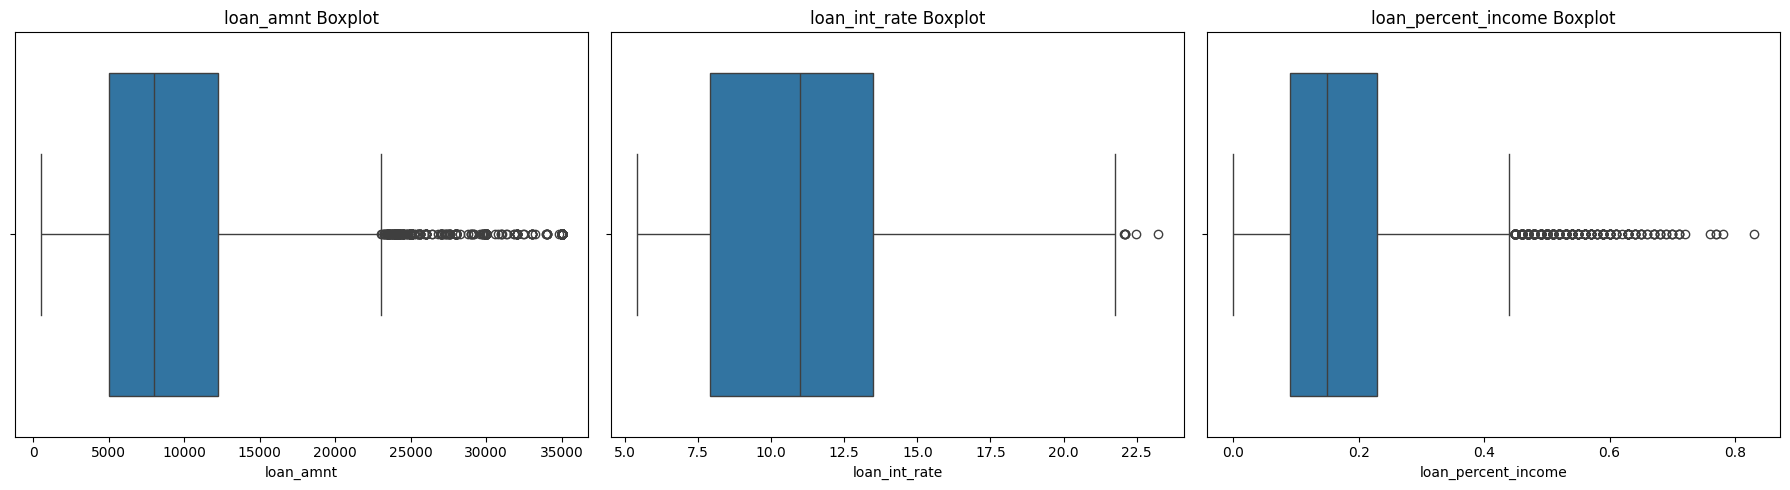

In [98]:
plt.figure(figsize=(18,5))

for i,f in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df[f])
    plt.title(f'{f} Boxplot')
plt.tight_layout()
plt.show()

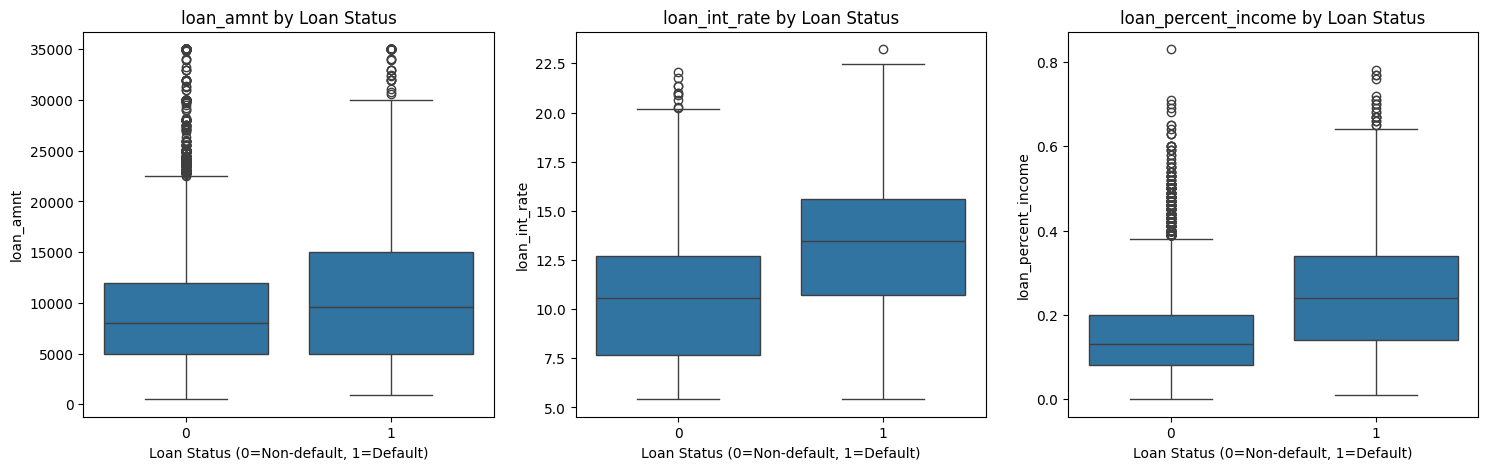

In [99]:
plt.figure(figsize=(18,5))

for i,f in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='loan_status', y=f, data=df)
    plt.title(f'{f} by Loan Status')
    plt.xlabel('Loan Status (0=Non-default, 1=Default)')
    plt.ylabel(f)
plt.show()

In [100]:
default_rate = df['loan_status'].mean()
print(f"Overall default rate: {default_rate:.2%}")

Overall default rate: 21.82%


In [101]:
# Default rate by home ownership
df.groupby('person_home_ownership')['loan_status'].mean() * 100

person_home_ownership
MORTGAGE    12.572534
OTHER       30.841121
OWN          7.469040
RENT        31.577667
Name: loan_status, dtype: float64

In [102]:
print(df.loan_intent.unique())
df.groupby('loan_intent')["loan_status"].mean()*100

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


loan_intent
DEBTCONSOLIDATION    28.587874
EDUCATION            17.222136
HOMEIMPROVEMENT      26.102635
MEDICAL              26.700708
PERSONAL             19.891304
VENTURE              14.818055
Name: loan_status, dtype: float64

In [103]:
# Default rate by loan grade
df.groupby('loan_grade')['loan_status'].mean() * 100

loan_grade
A     9.956389
B    16.280628
C    20.743610
D    59.045780
E    64.419087
F    70.539419
G    98.437500
Name: loan_status, dtype: float64

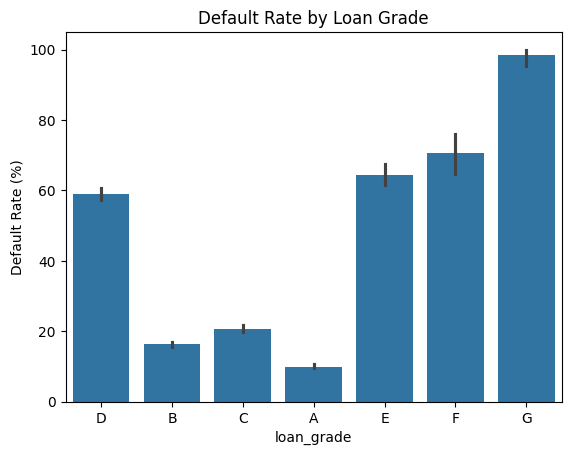

In [104]:
sns.barplot(x='loan_grade', y='loan_status', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Loan Grade')
plt.show()

In [105]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [106]:
df_encoded.isnull().sum()

person_age                        0
person_income                     0
person_emp_length               895
loan_amnt                         0
loan_int_rate                  3115
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_Y       0
dtype: int64

In [107]:
df_encoded['person_emp_length'].fillna(df_encoded['person_emp_length'].median(), inplace=True)
df_encoded['loan_int_rate'].fillna(df_encoded['loan_int_rate'].median(), inplace=True)

C:\Users\sahil\AppData\Local\Temp\ipykernel_25908\1726377402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['person_emp_length'].fillna(df_encoded['person_emp_length'].median(), inplace=True)
C:\Users\sahil\AppData\Local\Temp\ipykernel_25908\1726377402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [108]:
df_encoded.isnull().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
cb_person_default_on_file_Y    0
dtype: int64

In [109]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [110]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Using simpler model first -  Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [113]:
y_pred_prob = log_model.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob >= 0.5).astype(int)

In [114]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_score:.4f}")


Confusion Matrix:
 [[4842  251]
 [ 619  803]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5093
           1       0.76      0.56      0.65      1422

    accuracy                           0.87      6515
   macro avg       0.82      0.76      0.78      6515
weighted avg       0.86      0.87      0.86      6515


ROC-AUC Score: 0.8672


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=10,       # max depth of each tree
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_rf = rf_model.predict(X_test)

In [117]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC score
roc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"\nROC-AUC Score: {roc_score_rf:.4f}")

Confusion Matrix:
 [[4823  270]
 [ 351 1071]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      5093
           1       0.80      0.75      0.78      1422

    accuracy                           0.90      6515
   macro avg       0.87      0.85      0.86      6515
weighted avg       0.90      0.90      0.90      6515


ROC-AUC Score: 0.9239


In [118]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),  # handle class imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [119]:
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]
y_pred_xgb = xgb_model.predict(X_test)

In [120]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

roc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"\nROC-AUC Score: {roc_score_xgb:.4f}")

Confusion Matrix:
 [[4849  244]
 [ 291 1131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      5093
           1       0.82      0.80      0.81      1422

    accuracy                           0.92      6515
   macro avg       0.88      0.87      0.88      6515
weighted avg       0.92      0.92      0.92      6515


ROC-AUC Score: 0.9503


<Figure size 1000x600 with 0 Axes>

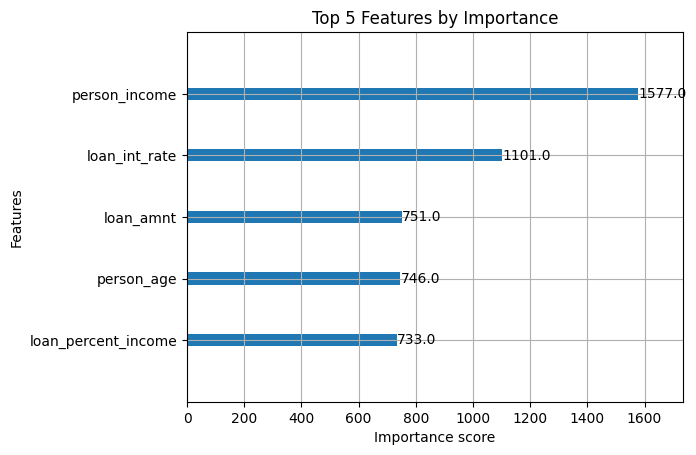

In [121]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=5, importance_type='weight')
plt.title('Top 5 Features by Importance')
plt.show()


In [122]:
import joblib

joblib.dump(xgb_model , "loan_default_model.pkl")

['loan_default_model.pkl']

In [123]:
df= df.drop(columns=["loan_int_rate"])

In [124]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[5047   46]
 [ 396 1026]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5093
           1       0.96      0.72      0.82      1422

    accuracy                           0.93      6515
   macro avg       0.94      0.86      0.89      6515
weighted avg       0.93      0.93      0.93      6515


ROC-AUC Score: 0.948276681018568


In [125]:
joblib.dump(xgb_model , "loan_default_model.pkl")

['loan_default_model.pkl']

## **Conclusion**

Based on the analysis and model evaluation, we can draw the following conclusions regarding loan default prediction using the available dataset.

---

### **1. Model Performance on the Given Dataset**

After retraining the XGBoost model **without `loan_int_rate`**, the classifier shows **strong performance** on this dataset:

#### **Confusion Matrix**

```
[[5047   46]
 [ 396 1026]]
```

#### **Classification Report**

```
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5093
           1       0.96      0.72      0.82      1422

    accuracy                           0.93      6515
   macro avg       0.94      0.86      0.89      6515
weighted avg       0.93      0.93      0.93      6515
```

#### **ROC-AUC Score**

```
0.9483
```

#### **Interpretation**

* The model predicts **non-defaults (class 0)** extremely well (99% recall).
* It predicts **defaults (class 1)** reasonably well (72% recall).
* Overall performance is strong with **93% accuracy** and **0.948 ROC-AUC**.
* This means the model performs **very well for this dataset** and can identify financially risky borrowers with high discriminatory power.

---

### **2. However, True Real-World Default Prediction Requires More Data**

Although the model performs very well **on this dataset**, it cannot reliably predict real-world loan defaults because several **critical financial features are missing**.

#### Missing Key Variables:

#### **1. Loan Tenure (Loan Duration)**

* Strongly affects EMI and borrower repayment burden.
* A 50k loan over 1 year vs. over 5 years are completely different risk levels.

#### **2. Monthly EMI (Installment Amount)**

* Banks assess risk based on **monthly cash flow**, not total loan amount.

#### **3. True Debt-to-Income Ratio (DTI)**

* Real DTI requires:

  * All existing debts
  * Total monthly obligations
  * Credit card balances
  * Car loans / mortgages

The dataset only provides a **simplified ratio**:

```
loan_amount / annual_income
```

which is not enough for real underwriting decisions.

#### **4. Other Missing Real-World Data**

* Total open credit lines
* Credit utilization
* Past delinquencies
* Revolving debt
* Monthly expenses
* Loan tenure & EMI schedule

Without these features, models cannot capture true borrower affordability or long-term repayment risk.

---

### **3. Final Statement**

Although this model performs **highly accurately on the given dataset**, its predictions cannot be considered precise or bank-grade for real-world loan underwriting due to missing crucial financial attributes.

It is best used for:

* **Educational purposes**
* **Baseline credit risk scoring**
* **Pattern recognition within the provided dataset**

But not for:

* Real commercial lending decisions
* Production-level credit approval systems

---